In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-type-classification/riceClassification.csv


In [151]:
df = pd.read_csv("/kaggle/input/rice-type-classification/riceClassification.csv")

In [152]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [154]:
import torch 
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader 
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [155]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [156]:
device

'cuda'

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [158]:
df.dropna(inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [160]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [161]:
df.shape

(18185, 11)

In [162]:
print(df['Class'].unique())
print(df['Class'].value_counts())

[1 0]
Class
1    9985
0    8200
Name: count, dtype: int64


In [163]:
df.describe().round(2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00
mean,7036.49,151.68,59.81,0.92,7225.82,94.13,0.62,351.61,0.71,2.60,0.55
std,1467.20,12.38,10.06,0.03,1502.01,9.91,0.10,29.50,0.07,0.43,0.50
min,2522.00,74.13,34.41,0.68,2579.00,56.67,0.38,197.02,0.17,1.36,0.00
25%,5962.00,145.68,51.39,0.89,6125.00,87.13,0.54,333.99,0.65,2.21,0.00
50%,6660.00,153.88,55.72,0.92,6843.00,92.09,0.60,353.09,0.70,2.60,1.00
75%,8423.00,160.06,70.16,0.94,8645.00,103.56,0.70,373.00,0.77,2.96,1.00
max,10210.00,183.21,82.55,0.97,11008.00,114.02,0.89,508.51,0.90,3.91,1.00


In [164]:
df.columns[:-1]
# print(columns[:-1])

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation'],
      dtype='object')

In [165]:
original_df = df.copy()

for column in df.columns[:-1]:
    df[column] = (df[column] - df[column].abs().min())/(df[column].abs().max() - df[column].abs().min()) 

In [166]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1


In [167]:
X = np.array(df.iloc[:, : -1])
Y = np.array(df.iloc[:, -1])

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [169]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [170]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [171]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [172]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [173]:
train_dataloader = DataLoader(training_data, batch_size = 8 , shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 8, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 8, shuffle = True)

In [174]:
for x, y in train_dataloader:
    print(x)
    print("####################")
    print(y)
    break
    

tensor([[0.8740, 0.7512, 0.8698, 0.6748, 0.8194, 0.9033, 0.6596, 0.5907, 0.8564,
         0.2694],
        [0.4870, 0.5027, 0.5793, 0.6857, 0.4474, 0.5694, 0.8455, 0.3534, 0.9044,
         0.2788],
        [0.9318, 0.8502, 0.8323, 0.7522, 0.8659, 0.9483, 0.4480, 0.6359, 0.8288,
         0.3455],
        [0.8329, 0.7712, 0.8035, 0.7249, 0.7875, 0.8707, 0.7148, 0.5889, 0.8221,
         0.3160],
        [0.4434, 0.5729, 0.4469, 0.8125, 0.4124, 0.5272, 0.3388, 0.3767, 0.7939,
         0.4248],
        [0.8522, 0.7663, 0.8264, 0.7094, 0.8046, 0.8861, 0.6653, 0.5946, 0.8297,
         0.3006],
        [0.9641, 0.8495, 0.8774, 0.7290, 0.9016, 0.9729, 0.4521, 0.6523, 0.8284,
         0.3203],
        [0.5280, 0.7661, 0.4126, 0.9040, 0.4954, 0.6080, 0.2076, 0.4984, 0.6736,
         0.6060]], device='cuda:0')
####################
tensor([0., 0., 0., 0., 1., 0., 0., 1.], device='cuda:0')


In [175]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [176]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [177]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [178]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data


        prediction = model(inputs).squeeze(1)
        
        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()
        
        acc = ((prediction).round() == labels).sum().item()
        
        total_acc_train += acc
        
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()
            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))

    
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))
    
    print(f'''Epoch no. {epoch + 1} Train Loss: {round(total_loss_train/1000, 4)} Train Acurracy {round(total_acc_train/training_data.__len__() * 100, 4)} Validatation Loss: {round(total_loss_val/1000, 4)} Validatation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}''')

    print("=" * 25)

Epoch no. 1 Train Loss: 0.3795 Train Acurracy 96.1034 Validatation Loss: 0.0205 Validatation Accuracy: 98.9003
Epoch no. 2 Train Loss: 0.0919 Train Acurracy 98.3109 Validatation Loss: 0.0122 Validatation Accuracy: 99.0469
Epoch no. 3 Train Loss: 0.0796 Train Acurracy 98.3581 Validatation Loss: 0.0109 Validatation Accuracy: 99.0103
Epoch no. 4 Train Loss: 0.0766 Train Acurracy 98.4681 Validatation Loss: 0.0112 Validatation Accuracy: 99.1202
Epoch no. 5 Train Loss: 0.076 Train Acurracy 98.4131 Validatation Loss: 0.0103 Validatation Accuracy: 99.1202
Epoch no. 6 Train Loss: 0.0756 Train Acurracy 98.4209 Validatation Loss: 0.0105 Validatation Accuracy: 98.9736
Epoch no. 7 Train Loss: 0.0754 Train Acurracy 98.4288 Validatation Loss: 0.0105 Validatation Accuracy: 98.937
Epoch no. 8 Train Loss: 0.0756 Train Acurracy 98.4445 Validatation Loss: 0.0102 Validatation Accuracy: 98.937
Epoch no. 9 Train Loss: 0.0751 Train Acurracy 98.4602 Validatation Loss: 0.0107 Validatation Accuracy: 98.937
Epoch

In [179]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in testing_dataloader:

        inputs,labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss_test = criterion(prediction, labels).item()
        total_loss_test += batch_loss_test

        acc = ((prediction).round() == labels).sum().item()

        total_acc_test += acc
print("Accuracy", round(total_acc_test/ testing_data.__len__() * 100, 4))

Accuracy 98.6804


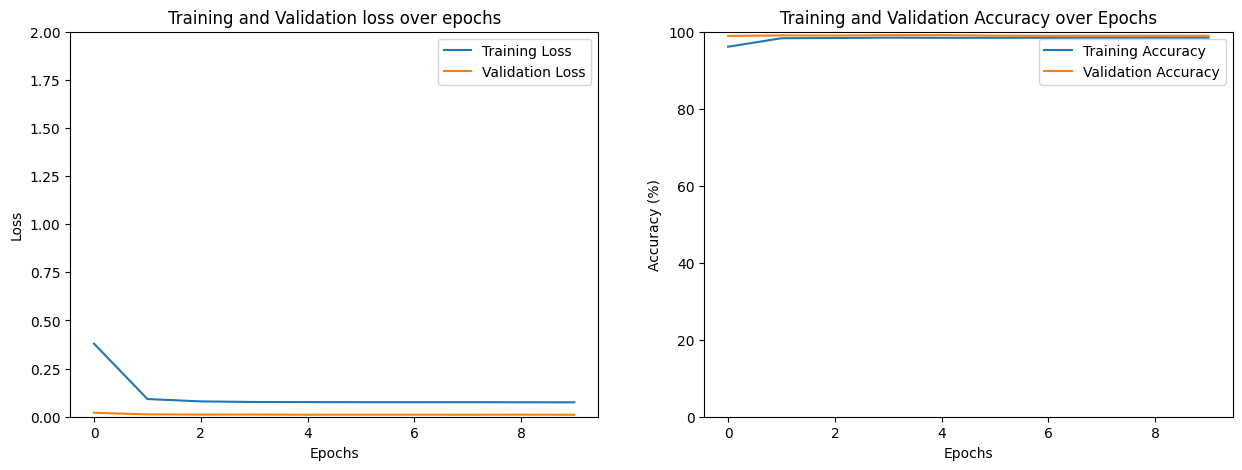

In [180]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = 'Training Loss')
axs[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy over Epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy (%)')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.show()